<div style="text-align: right; color:#006d77">
    <h3>Name: Sanjhi jain</h3>
    <h3>Roll Number: CSC/21/19</h3>
    <h3>University Roll No: 21059570046</h3>
    <h3>University: Aryabhatta College University of Delhi</h3>
</div>

<div style="color:#006d77">
    <h3>Project : Covid19 Data Analysis</h3>
</div>

In [1]:
#importing essential libraries for the project
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color:#023e8a;font-weight:bold">Download Covid_19_India Dataset named “covid_19_india.csv” from https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_19_india.csv and perform the following, with proper annotations of the legend and axes labels:</span>

In [2]:
#reading and loading data set from csv to dataframe
covid=pd.read_csv("./covid_19_india.csv")
df=pd.read_csv("./covid_19_india.csv")

In [3]:
#Demo of the loaded data
#5 starting row of data
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,3,0,0,0,3


In [4]:
#5 ending rows of Data
covid.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,8/11/2021,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,8/11/2021,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,8/11/2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,8/11/2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,8/11/2021,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [5]:
#sahpe of loaded data
covid.shape

(18110, 9)

In [6]:
#identifying number of rows
print("Total Number Of Rows :",covid.shape[0])
print("Total Number Of Columns :",covid.shape[1])

Total Number Of Rows : 18110
Total Number Of Columns : 9


<span style="color:#023e8a;font-weight:bold">1. For each Indian state, find maximum cases reported for confirmed, deaths and recovered individually along with date on which these cases were reported for any three months of year 2020. Display the result in the self-explanatory format.</span>

In [7]:
# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Filter rows for the year 2020 and the months we are interested in
df_2020 = df[(df['Date'].dt.year == 2020) & (df['Date'].dt.month.isin([1, 2, 3]))]

# Group by state and find the date of maximum cases for confirmed, deaths, and recovered
max_cases = df_2020.groupby('State/UnionTerritory').agg({
    'Confirmed': ['idxmax', 'max'],
    'Deaths': ['idxmax', 'max'],
    'Cured': ['idxmax', 'max']
})

# Get the dates of maximum cases
max_cases.columns = ['_'.join(col) for col in max_cases.columns]
max_cases['Confirmed_date'] = df_2020.loc[max_cases['Confirmed_idxmax'], 'Date'].values
max_cases['Deaths_date'] = df_2020.loc[max_cases['Deaths_idxmax'], 'Date'].values
max_cases['Cured_date'] = df_2020.loc[max_cases['Cured_idxmax'], 'Date'].values

# Drop the index columns
max_cases = max_cases.drop(columns=['Confirmed_idxmax', 'Deaths_idxmax', 'Cured_idxmax'])

max_cases

,Confirmed_max,Deaths_max,Cured_max,Confirmed_date,Deaths_date,Cured_date
State/UnionTerritory,,,,,,
Andaman and Nicobar Islands,10,0,0,2020-03-31,2020-03-26,2020-03-26
Andhra Pradesh,40,0,1,2020-03-31,2020-03-12,2020-03-25
Bihar,15,1,0,2020-03-30,2020-03-22,2020-03-22
Chandigarh,13,0,0,2020-03-31,2020-03-19,2020-03-19
Chhattisgarh,8,0,0,2020-03-31,2020-03-19,2020-03-19
Delhi,97,2,6,2020-03-31,2020-03-29,2020-03-24
Goa,5,0,0,2020-03-29,2020-03-26,2020-03-26
Gujarat,73,6,3,2020-03-31,2020-03-30,2020-03-31
Haryana,40,0,21,2020-03-31,2020-03-04,2020-03-31


<span style="color:#023e8a;font-weight:bold">2. Use appropriate year-month string date conversions for example: Identify the no. of cases on the 6th day of the month by converting year-month string to dates.</span>

In [8]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Filter rows where the day is 6
df_6th_day = df[df['Date'].dt.day == 6]

# Count the number of cases on the 6th day of each month
num_cases = df_6th_day['Confirmed'].sum()

print(f"The number of cases on the 6th day of each month is {num_cases}")

The number of cases on the 6th day of each month is 189237962


<span style="color:#023e8a;font-weight:bold">3.Create subplots (line graph) for showing total number of cured cases month-wise from April 2020 to March 2021 in four states namely Karnataka, Gujarat, Haryana, and Uttar Pradesh.</span>

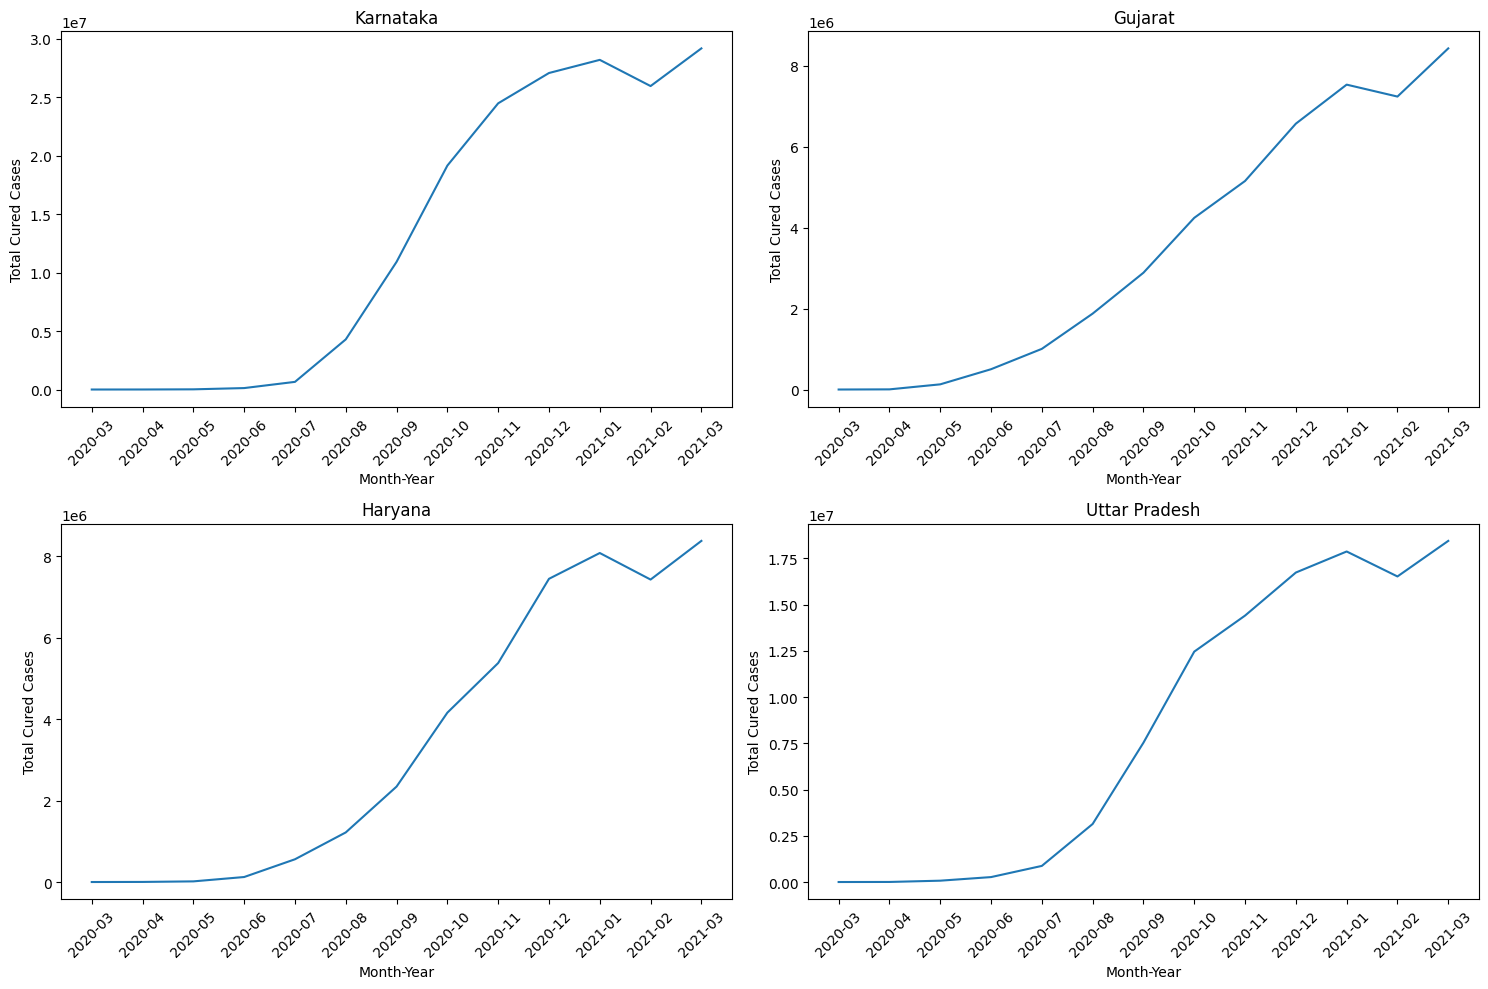

In [9]:
# Filter rows for the dates from April 2020 to March 2021
start_date = pd.to_datetime('01/04/2020')
end_date = pd.to_datetime('31/03/2021',dayfirst=True)
ndf = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
# print(ndf)

# Filter rows for the states you are interested in
states = ['Karnataka', 'Gujarat', 'Haryana', 'Uttar Pradesh']
ndf = ndf[ndf['State/UnionTerritory'].isin(states)]

# Group by state and month and sum the number of cured cases
ndf['Month-Year'] = ndf['Date'].dt.to_period('M')
ndf_grouped = ndf.groupby(['State/UnionTerritory', 'Month-Year'])['Cured'].sum().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, state in zip(axs.flatten(), states):
    ndf_state = ndf_grouped[ndf_grouped['State/UnionTerritory'] == state]
    ax.plot(ndf_state['Month-Year'].astype(str), ndf_state['Cured'])
    ax.set_title(state)
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('Total Cured Cases')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<span style="color:#023e8a;font-weight:bold">4.Compare the deaths due to Covid-19 in the months of May 2020 and May 2021 for the
states namely Karnataka, Delhi, and Madhya Pradesh using stacked bars.</span>

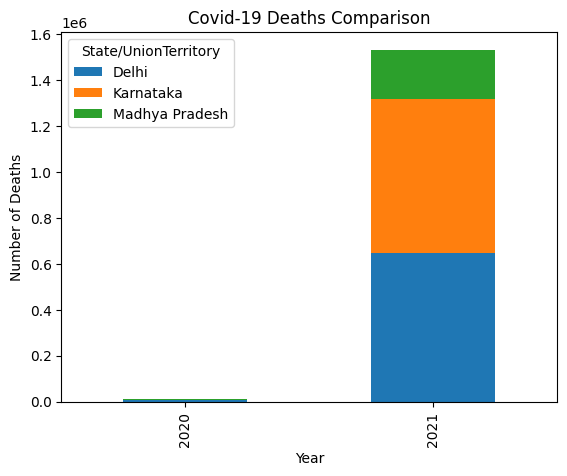

In [10]:
# Filter data for the states and months of interest
states = ['Karnataka', 'Delhi', 'Madhya Pradesh']
st=["Delhi"]
cdf = df[df['State/UnionTerritory'].isin(states) & df['Date'].dt.month.isin([5])
         & df['Date'].dt.year.isin([2020, 2021])]
# print(cdf)
# Group by state and year and calculate the sum of deaths
cdf_grouped = cdf.groupby([cdf['Date'].dt.year, 'State/UnionTerritory'])['Deaths'].sum().unstack()

# Plot the data
cdf_grouped.plot(kind='bar', stacked=True)
plt.title('Covid-19 Deaths Comparison')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show()

<span style="color:#023e8a;font-weight:bold">5.Make a graph to show the month wise relation (Positive/Negative/Neutral) between number of confirmed Covid-19 cases and Deaths in Uttar Pradesh. Display correlation value too in the graph</span>

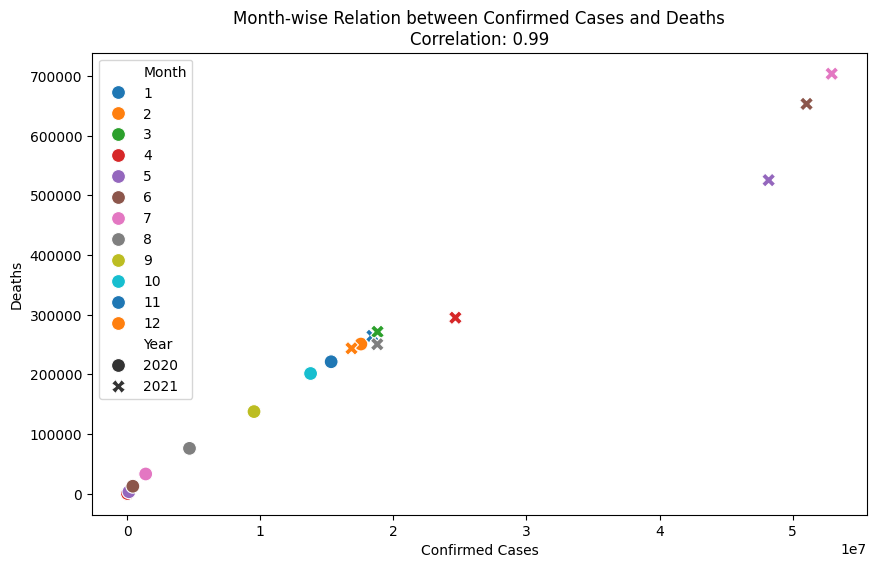

In [11]:
# Filter data for Uttar Pradesh
rdf = df[df['State/UnionTerritory'] == 'Uttar Pradesh'].copy()

# Extract year and month from 'Date'
rdf.loc[:, 'Year'] = rdf['Date'].dt.year
rdf.loc[:, 'Month'] = rdf['Date'].dt.month

# Group by year and month and calculate the sum of confirmed cases and deaths
rdf_grouped = rdf.groupby(['Year', 'Month']).agg({'Confirmed': 'sum', 'Deaths': 'sum'}).reset_index()

# Calculate correlation
correlation = rdf_grouped['Confirmed'].corr(rdf_grouped['Deaths'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rdf_grouped, x='Confirmed', y='Deaths',palette='tab10', hue='Month', style='Year', s=100)
plt.title(f'Month-wise Relation between Confirmed Cases and Deaths\nCorrelation: {correlation:.2f}')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()